### Import Library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
print(df.shape)
print("")
print(df.isnull().sum())

(8124, 23)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [11]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### Handling Categorical Feature

In [38]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df["class"] = df["class"].map({"e":0, "p":1})  #Edible = 0, Posionous = 1
df["ring-number"] = df["ring-number"].map({"n":0, "o":1, "t":2}) #None:0, One:1, Two:2
df["bruises"] = df["bruises"].map({"f":0, "t":1}) #False:0, True: 1

In [35]:
print(df["veil-type"].value_counts())
df.drop("veil-type", axis=1, inplace=True) #Drop column due to uniform data

p    8124
Name: veil-type, dtype: int64


In [43]:
col_le = df.drop(["class","ring-number","bruises"],axis=1)
le = LabelEncoder()
for i in col_le.columns:
    col_le[i] = le.fit_transform(col_le[i])

In [57]:
#concat into one dataframe
df_comp = pd.concat([col_le,df[["ring-number","bruises","class"]]],axis=1)

### EDA

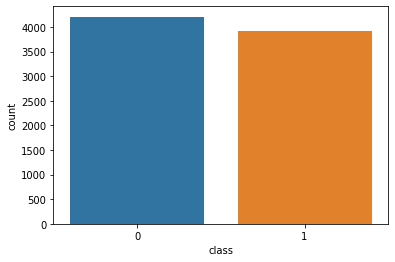

In [60]:
sns.countplot(df_comp["class"])

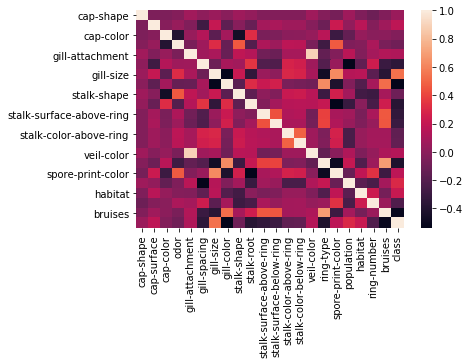

In [66]:
sns.heatmap(df_comp.corr())

### Creating model

In [72]:
# Spliting dataset
from sklearn.model_selection import train_test_split

x = df_comp.drop("class",axis=1)
y = df_comp["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
sv = SVC()

In [117]:
model = [lr,rf,kn,sv]
model_name = {lr:"Logistic Regression", rf:"Random Forest", kn:"KNN",sv:"SVC"}

In [118]:
for i in model:
    i.fit(x_train,y_train)
    print(model_name[i],"score:",i.score(x_test,y_test))

C:\Users\bima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression score: 0.9569230769230769
Random Forest score: 1.0
KNN score: 0.9993846153846154
SVC score: 0.9901538461538462


- Random Forest model memiliki tingkat akurasi paling besar

### Evaluating Model

In [112]:
from sklearn.metrics import classification_report, plot_precision_recall_curve,plot_confusion_matrix,plot_roc_curve

In [119]:
for i in model:
    y_pred = i.predict(x_test)
    print(model_name[i])
    print(classification_report(y_test,y_pred))
    print("="*70)

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       833
           1       0.96      0.96      0.96       792

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00   

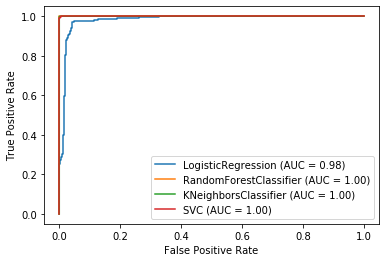

In [121]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sv,x_test,y_test,ax=disp.ax_)

insight: 
- Hampir setiap model memiliki performa yang sangat baik.
- Random Forest mendapat nilai akurasi, F1 score tertinggi. baik dalam data training maupun testing